In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from dipy.core.gradients import gradient_table

In [3]:
gtab = gradient_table('./data/DWI_IVIM6.bval', './data/DWI_IVIM6.bvec', b0_threshold=0)

In [4]:
from dipy.sims.voxel import multi_tensor

In [5]:
mevals = np.array([[0.001, 0.0005, 0.0005], 
                   [0.1, 0.01, 0.01]])

angles = [(90, 0), (90, 0)]

In [6]:
from ivim_tensor import IvimTensorModel

In [7]:
itm = IvimTensorModel(gtab)

/srv/conda/envs/notebook/lib/python3.7/site-packages/dipy/reconst/ivim.py:151: UserWarning: Bounds for this fit have been set from experiments and literature survey. To change the bounds, please input your bounds in model definition...
  warnings.warn(bounds_warning, UserWarning)


In [8]:
betas = np.arange(0.001, 0.3, 0.05)

In [9]:
n_sims = 100

In [10]:
pf = np.zeros((len(betas), n_sims))
sim = np.zeros((len(betas), n_sims, gtab.bvals.shape[0]))

for ii in range(len(betas)):
    for nn in range(n_sims):
        sim[ii, nn] = multi_tensor(gtab, mevals=mevals, snr=100, fractions=[100 * (1-betas[ii]), 
                                                                     betas[ii] * 100])[0]
#pf[ii, nn] = (itf.perfusion_fraction)

In [11]:
itf = itm.fit(sim)

/srv/conda/envs/notebook/lib/python3.7/site-packages/dipy/reconst/ivim.py:434: UserWarning: x0 obtained from linear fitting is not feasibile as initial guess for leastsq while estimating f and D_star. Using parameters from the linear fit.
  warnings.warn(warningMsg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/dipy/reconst/ivim.py:507: UserWarning: x0 is unfeasible for leastsq fitting. Returning x0 values from the linear fit.
  warnings.warn(warningMsg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/dipy/reconst/ivim.py:344: UserWarning: Bounds are violated for leastsq fitting. Returning parameters from linear fit
  warnings.warn(warningMsg, UserWarning)
100%|██████████| 600/600 [00:02<00:00, 247.26it/s]


In [12]:
sim.shape

(6, 100, 79)

In [13]:
pf = np.reshape(itf.perfusion_fraction, sim.shape[:2])

In [14]:
np.mean(pf, -1)

array([0.0737574 , 0.0479837 , 0.0853003 , 0.12648693, 0.16640251,
       0.19991591])

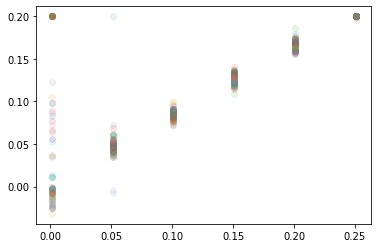

In [15]:
plt.plot(betas, pf, 'o', alpha=0.1)

In [16]:
itf.perfusion_fraction

array([ 0.2       ,  0.2       , -0.01075074,  0.2       ,  0.2       ,
       -0.02549536,  0.07181968,  0.2       , -0.01398832,  0.2       ,
       -0.0220304 , -0.01177193,  0.2       , -0.00608412,  0.05607834,
       -0.02517471,  0.2       ,  0.2       , -0.0321389 ,  0.2       ,
        0.09846829, -0.00033949, -0.00775976, -0.00623063,  0.05540927,
        0.2       ,  0.08680636, -0.01452512, -0.0106841 , -0.01798989,
        0.2       , -0.01630245, -0.01627589,  0.07723271, -0.02578629,
        0.0635434 , -0.00821197, -0.00167344, -0.00742209,  0.01071477,
        0.2       ,  0.10465809, -0.00271923, -0.00697969,  0.2       ,
        0.09850533, -0.00434739, -0.00136353,  0.2       ,  0.01352175,
        0.08286171,  0.2       ,  0.01125113, -0.00369067, -0.01827183,
        0.03657874,  0.2       ,  0.2       , -0.0036987 , -0.0094972 ,
        0.2       ,  0.2       ,  0.2       ,  0.2       , -0.01297884,
       -0.00840424, -0.00080158,  0.2       ,  0.2       , -0.00